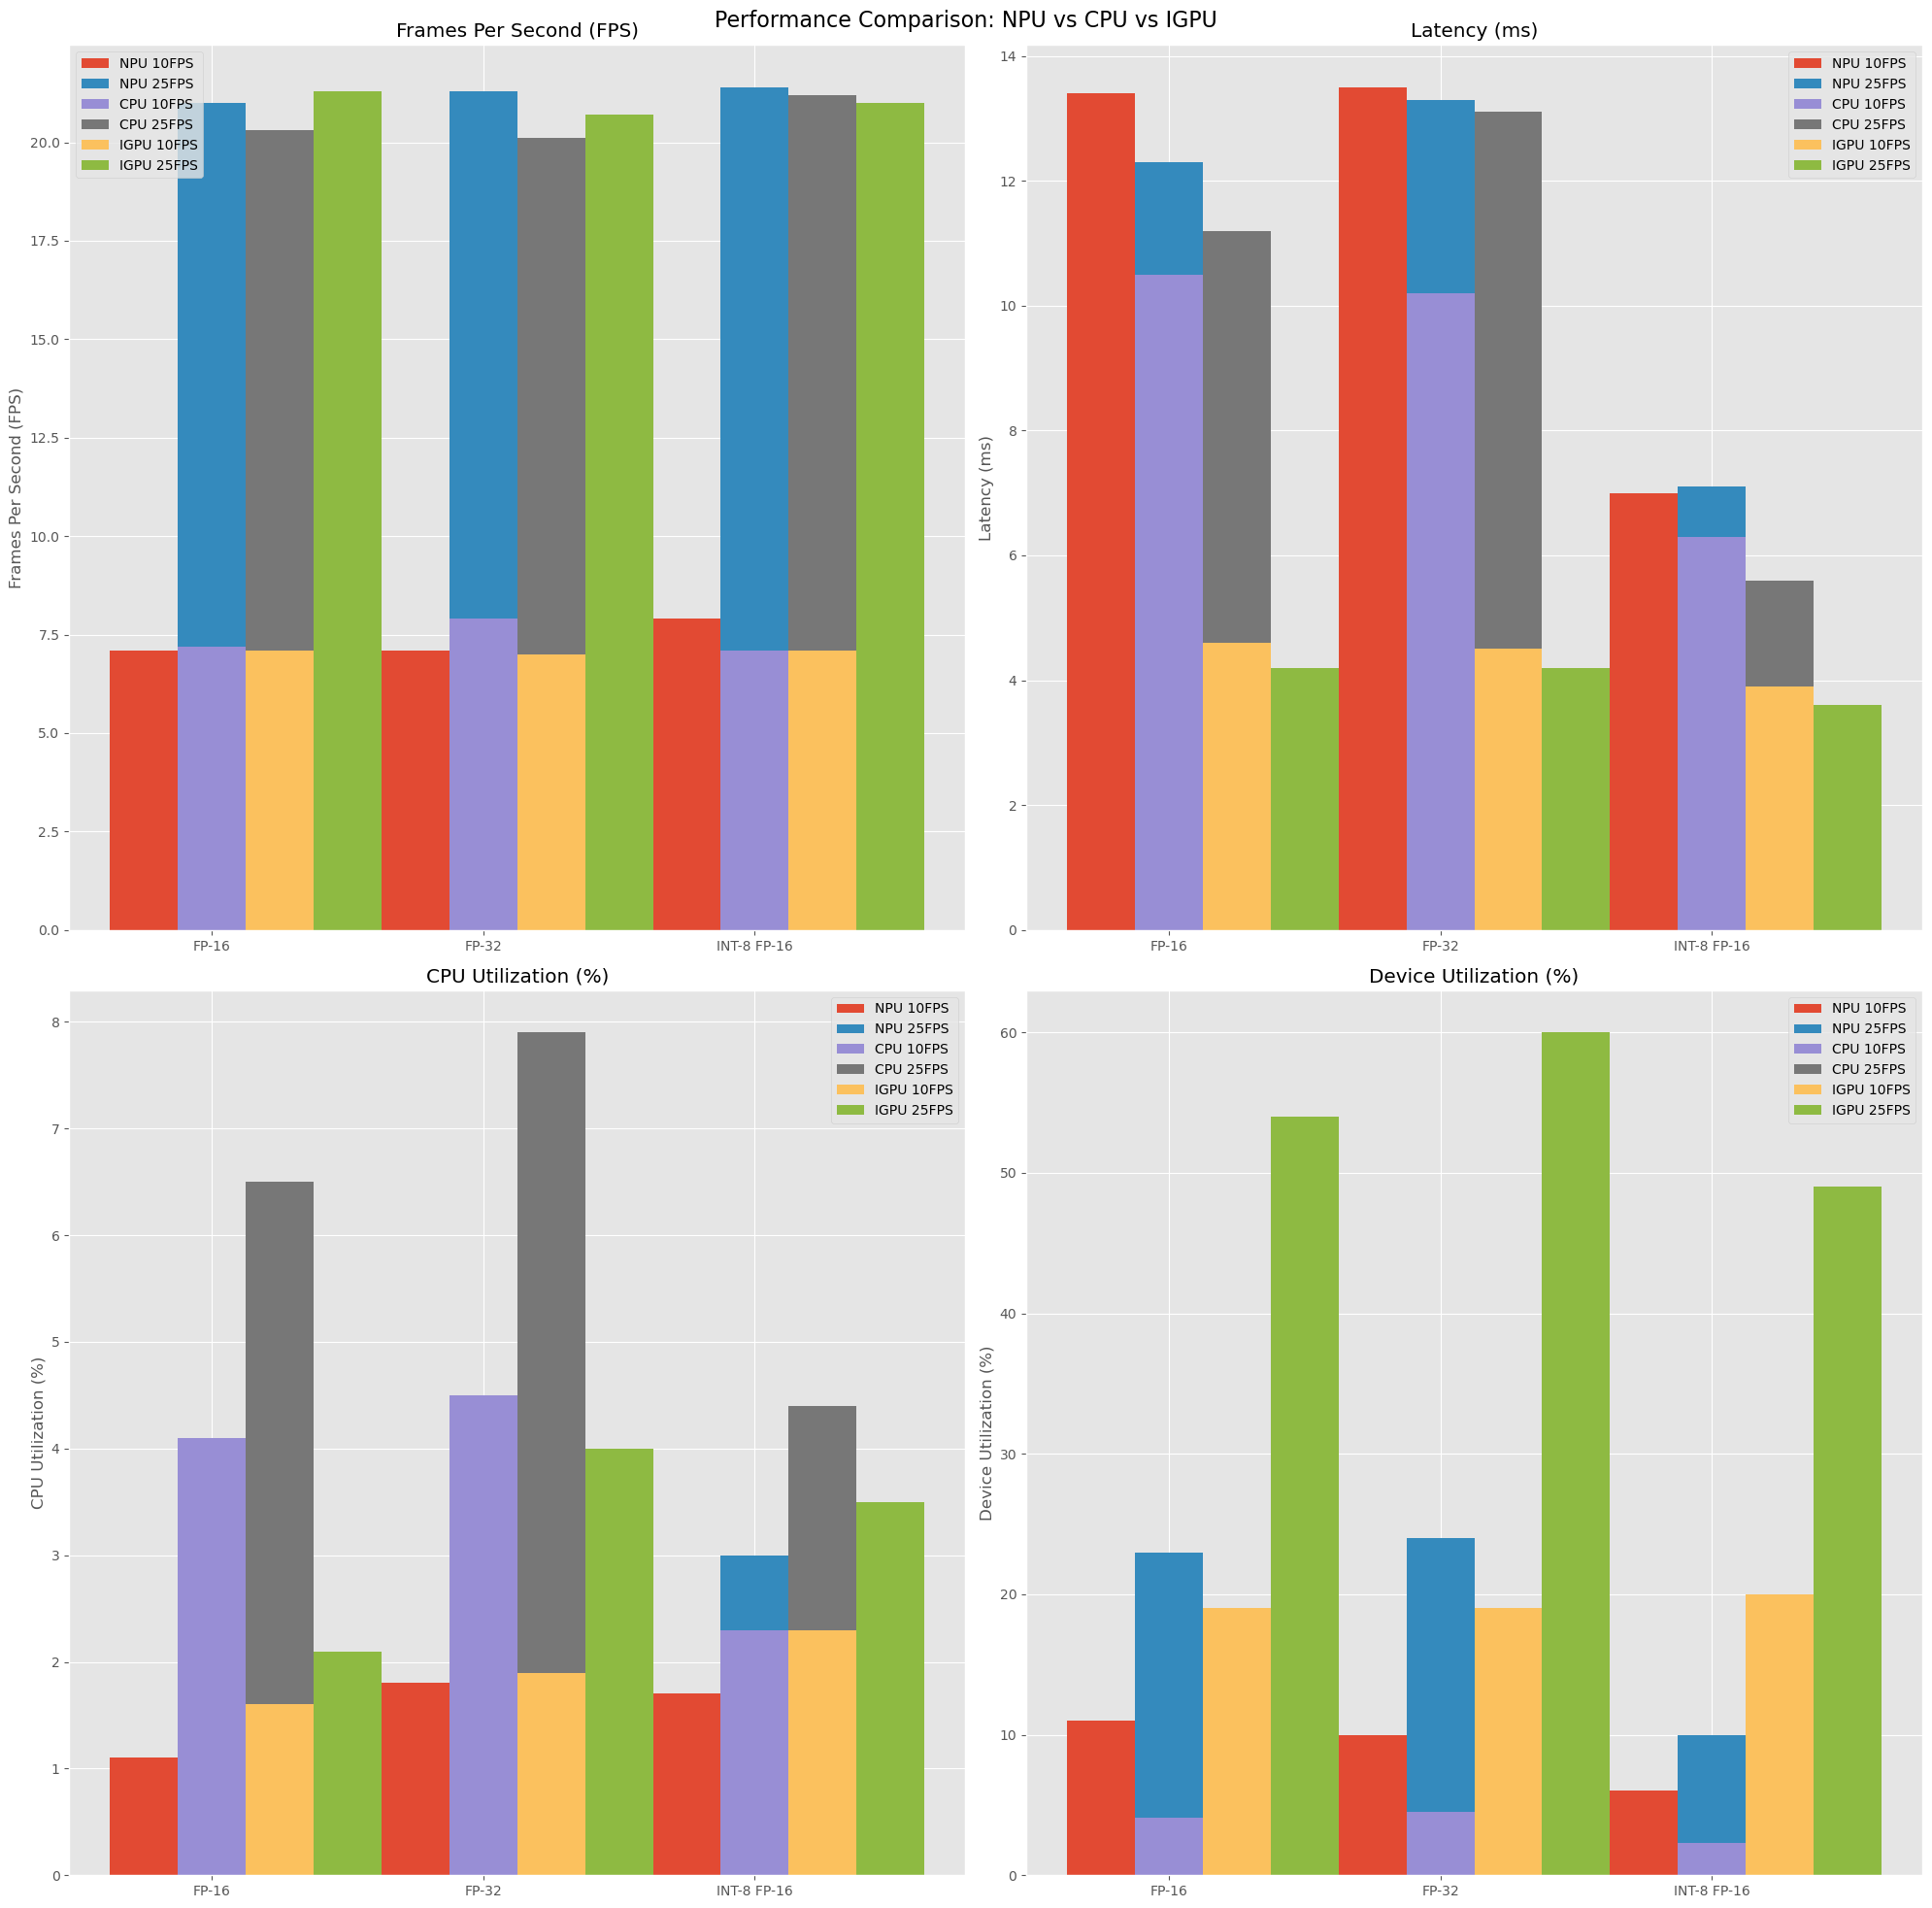

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to create DataFrame from the table data
def create_dataframe(data, device):
    df = pd.DataFrame(data, columns=['Quant', 'Device', 'Limit', 'FPS', 'Latency', 'CPU_Util', 'Device_Util'])
    df['DeviceType'] = device
    return df

# Data for each device (removed Max FPS entries)
npu_data = [
    ['FP-16', 'NPU', '10 - FPS', 7.1, 13.4, 1.1, 11.0],
    ['FP-16', 'NPU', '25 - FPS', 21.0, 12.3, 2.1, 23.0],
    ['FP-32', 'NPU', '10 - FPS', 7.1, 13.5, 1.8, 10.0],
    ['FP-32', 'NPU', '25 - FPS', 21.3, 13.3, 2.7, 24.0],
    ['INT-8 FP-16', 'NPU', '10 - FPS', 7.9, 7.0, 1.7, 6.0],
    ['INT-8 FP-16', 'NPU', '25 - FPS', 21.4, 7.1, 3.0, 10.0]
]

cpu_data = [
    ['FP-16', 'CPU', '10 - FPS', 7.2, 10.5, 4.1, 4.1],
    ['FP-16', 'CPU', '25 - FPS', 20.3, 11.2, 6.5, 6.5],
    ['FP-32', 'CPU', '10 - FPS', 7.9, 10.2, 4.5, 4.5],
    ['FP-32', 'CPU', '25 - FPS', 20.1, 13.1, 7.9, 7.9],
    ['INT-8 FP-16', 'CPU', '10 - FPS', 7.1, 6.3, 2.3, 2.3],
    ['INT-8 FP-16', 'CPU', '25 - FPS', 21.2, 5.6, 4.4, 4.4]
]

igpu_data = [
    ['FP-16', 'IGPU', '10 - FPS', 7.1, 4.6, 1.6, 19.0],
    ['FP-16', 'IGPU', '25 - FPS', 21.3, 4.2, 2.1, 54.0],
    ['FP-32', 'IGPU', '10 - FPS', 7.0, 4.5, 1.9, 19.0],
    ['FP-32', 'IGPU', '25 - FPS', 20.7, 4.2, 4.0, 60.0],
    ['INT-8 FP-16', 'IGPU', '10 - FPS', 7.1, 3.9, 2.3, 20.0],
    ['INT-8 FP-16', 'IGPU', '25 - FPS', 21.0, 3.6, 3.5, 49.0]
]

# Create DataFrames
df_npu = create_dataframe(npu_data, 'NPU')
df_cpu = create_dataframe(cpu_data, 'CPU')
df_igpu = create_dataframe(igpu_data, 'IGPU')

# Combine all data
df_all = pd.concat([df_npu, df_cpu, df_igpu], ignore_index=True)

# Set up the plot style
plt.style.use('ggplot')

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Performance Comparison: NPU vs CPU vs IGPU', fontsize=16)

metrics = ['FPS', 'Latency', 'CPU_Util', 'Device_Util']
titles = ['Frames Per Second (FPS)', 'Latency (ms)', 'CPU Utilization (%)', 'Device Utilization (%)']

for i, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[i // 2, i % 2]
    
    x = np.arange(len(df_all['Quant'].unique()))
    width = 0.25
    
    for j, device in enumerate(df_all['DeviceType'].unique()):
        data_10fps = df_all[(df_all['DeviceType'] == device) & (df_all['Limit'] == '10 - FPS')]
        data_25fps = df_all[(df_all['DeviceType'] == device) & (df_all['Limit'] == '25 - FPS')]
        
        ax.bar(x - width + j*width, data_10fps[metric], width, label=f'{device} 10FPS')
        ax.bar(x + j*width, data_25fps[metric], width, label=f'{device} 25FPS')
    
    ax.set_ylabel(title)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(df_all['Quant'].unique())
    ax.legend()

plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to create DataFrame from the table data
def create_dataframe(data, device):
    df = pd.DataFrame(data, columns=['Quant', 'Device', 'Limit', 'FPS', 'Latency', 'CPU_Util', 'Device_Util'])
    df['DeviceType'] = device
    return df

# Data for each device (removed Max FPS entries)
npu_data = [
    ['FP-16', 'NPU', '10 - FPS', 7.1, 13.4, 1.1, 11.0],
    ['FP-16', 'NPU', '25 - FPS', 21.0, 12.3, 2.1, 23.0],
    ['FP-32', 'NPU', '10 - FPS', 7.1, 13.5, 1.8, 10.0],
    ['FP-32', 'NPU', '25 - FPS', 21.3, 13.3, 2.7, 24.0],
    ['INT-8 FP-16', 'NPU', '10 - FPS', 7.9, 7.0, 1.7, 6.0],
    ['INT-8 FP-16', 'NPU', '25 - FPS', 21.4, 7.1, 3.0, 10.0]
]

cpu_data = [
    ['FP-16', 'CPU', '10 - FPS', 7.2, 10.5, 4.1, 4.1],
    ['FP-16', 'CPU', '25 - FPS', 20.3, 11.2, 6.5, 6.5],
    ['FP-32', 'CPU', '10 - FPS', 7.9, 10.2, 4.5, 4.5],
    ['FP-32', 'CPU', '25 - FPS', 20.1, 13.1, 7.9, 7.9],
    ['INT-8 FP-16', 'CPU', '10 - FPS', 7.1, 6.3, 2.3, 2.3],
    ['INT-8 FP-16', 'CPU', '25 - FPS', 21.2, 5.6, 4.4, 4.4]
]

igpu_data = [
    ['FP-16', 'IGPU', '10 - FPS', 7.1, 4.6, 1.6, 19.0],
    ['FP-16', 'IGPU', '25 - FPS', 21.3, 4.2, 2.1, 54.0],
    ['FP-32', 'IGPU', '10 - FPS', 7.0, 4.5, 1.9, 19.0],
    ['FP-32', 'IGPU', '25 - FPS', 20.7, 4.2, 4.0, 60.0],
    ['INT-8 FP-16', 'IGPU', '10 - FPS', 7.1, 3.9, 2.3, 20.0],
    ['INT-8 FP-16', 'IGPU', '25 - FPS', 21.0, 3.6, 3.5, 49.0]
]

# Create DataFrames
df_npu = create_dataframe(npu_data, 'NPU')
df_cpu = create_dataframe(cpu_data, 'CPU')
df_igpu = create_dataframe(igpu_data, 'IGPU')

# Combine all data
df_all = pd.concat([df_npu, df_cpu, df_igpu], ignore_index=True)

# Set up the plot style
plt.style.use('ggplot')

# Function to create and save a plot
def create_plot(metric, title, ylabel, filename):
    fig, ax = plt.subplots(figsize=(16, 9))  # 16:9 ratio
    
    x = np.arange(len(df_all['Quant'].unique()))
    width = 0.15
    
    for i, device in enumerate(df_all['DeviceType'].unique()):
        data_10fps = df_all[(df_all['DeviceType'] == device) & (df_all['Limit'] == '10 - FPS')]
        data_25fps = df_all[(df_all['DeviceType'] == device) & (df_all['Limit'] == '25 - FPS')]
        
        ax.bar(x + (i-1)*width, data_10fps[metric], width, label=f'{device} 10FPS')
        ax.bar(x + i*width, data_25fps[metric], width, label=f'{device} 25FPS')
    
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(df_all['Quant'].unique())
    ax.legend()
    
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

# Create and save individual plots
create_plot('FPS', 'Frames Per Second (FPS) Comparison', 'FPS', 'fps_comparison.png')
create_plot('Latency', 'Latency Comparison', 'Latency (ms)', 'latency_comparison.png')
create_plot('CPU_Util', 'CPU Utilization Comparison', 'CPU Utilization (%)', 'cpu_utilization_comparison.png')
create_plot('Device_Util', 'Device Utilization Comparison', 'Device Utilization (%)', 'device_utilization_comparison.png')

print("Plots have been generated and saved as separate PNG files.")

Plots have been generated and saved as separate PNG files.
